# Setup 3

The first setup tests the `simple` endpoint with the following parameters.

<table>
    <tr>
        <th>t between Runs</th>
        <td>1hr</td>
    </tr>
    <tr>
        <th>Request Count</th>
        <td>100</td>
    </tr>
    <tr>
        <th>Parallel</th>
        <td>10</td>
    </tr>
    <tr>
        <th>Wait</th>
        <td>10us..100us</td>
    </tr>
</table>

The test was run every one hour with 100 requests at a time in parallel with a maximum amount of 10 concurrent requests with a random delay between 10 and 100 microsecods in between the requests.

All durations in charts are displayed in milliseconds.

In [11]:
from scripts.util import *

First, we are fetching the datasets. They are dataframes containing the different runs with one hour space in between.

In [12]:
dataset_go = get_dataset("setup3/simple/go")
dataset_node = get_dataset("setup3/simple/node")
dataset_python = get_dataset("setup3/simple/python")
dataset_rust = get_dataset("setup3/simple/rust")

## Hot request durations per framework used

Following, we analyze the average request duration over all individual hot runs per framework used.

The lowest bar shows the median request duration, the bar above displays the 90th percentile, the bar above the 95th percentile and the most top bar the 99th percentile.

As you can see, the first probe is cut from the data. This is done to exclude the cold satrted reqeusts because we only want to analyze the actual hot request times.

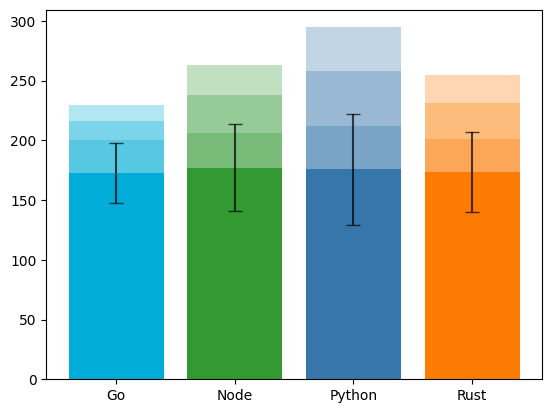

In [13]:
plot_combined(dataset_go, dataset_node, dataset_python, dataset_rust, 
              trans=lambda x: x[10:])

## Cold request durations per framework used

Now, we analyze the average request duration over all individual cold runs per framework used.

The lowest bar shows the median request duration, the bar above displays the 90th percentile, the bar above the 95th percentile and the most top bar the 99th percentile.

This time, we only analyze the first probe for each run which shows the cold start request time.

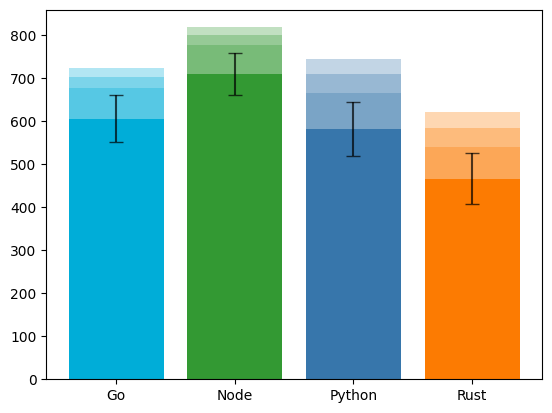

In [24]:
plot_combined(dataset_go, dataset_node, dataset_python, dataset_rust, 
              trans=lambda x: x[:10])

## Median response times per request for framework `Go`

Now, we take a look at the detailed response time medians over all runs for each single request using the framework `Go`.

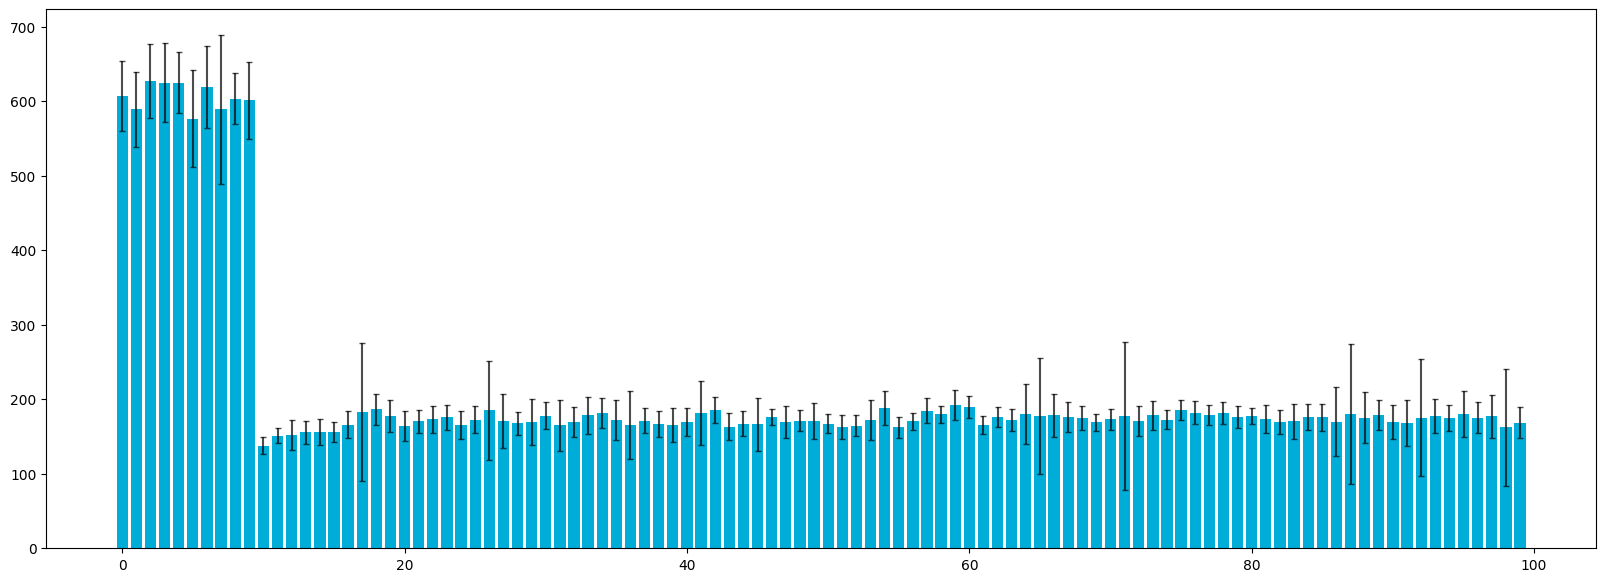

In [25]:
plot_dataset(dataset_go, color=Colors.GO)

## Median response times per request for framework `Node`

Now, we take a look at the detailed response time medians over all runs for each single request using the framework `Node`.

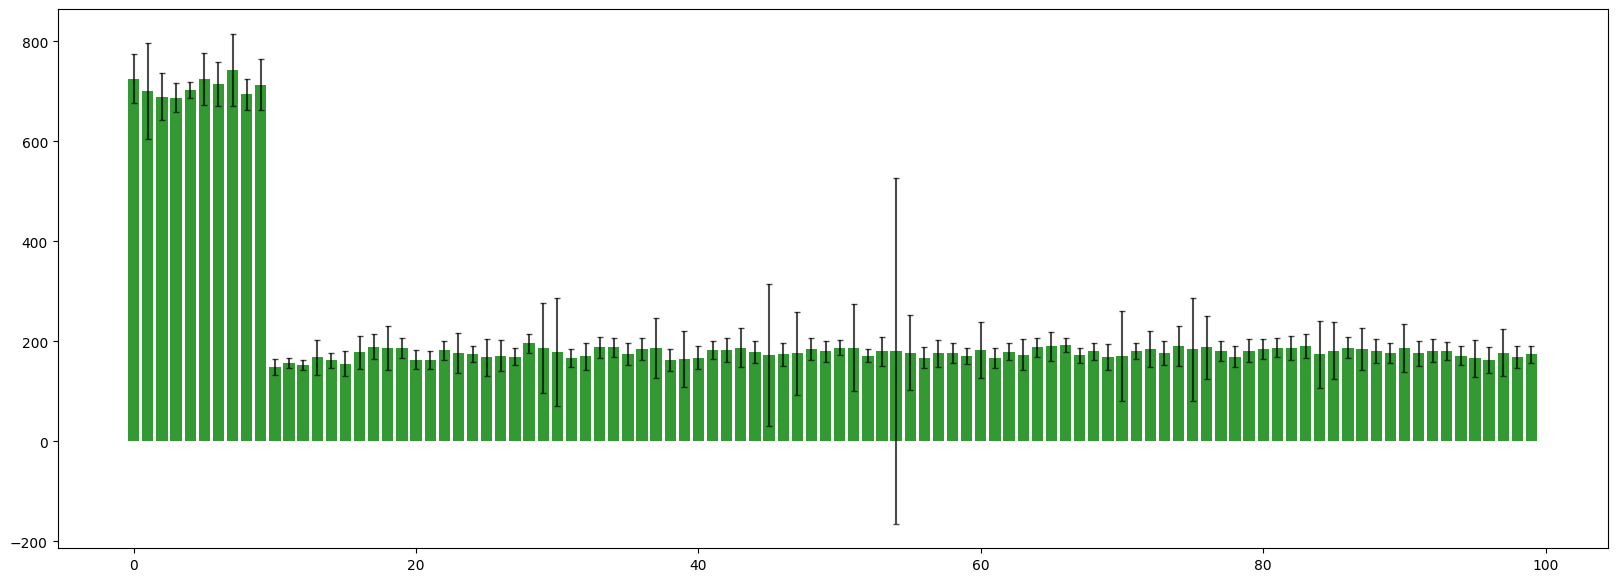

In [26]:
plot_dataset(dataset_node, color=Colors.NODE)

## Median response times per request for framework `Python`

Now, we take a look at the detailed response time medians over all runs for each single request using the framework `Python`.

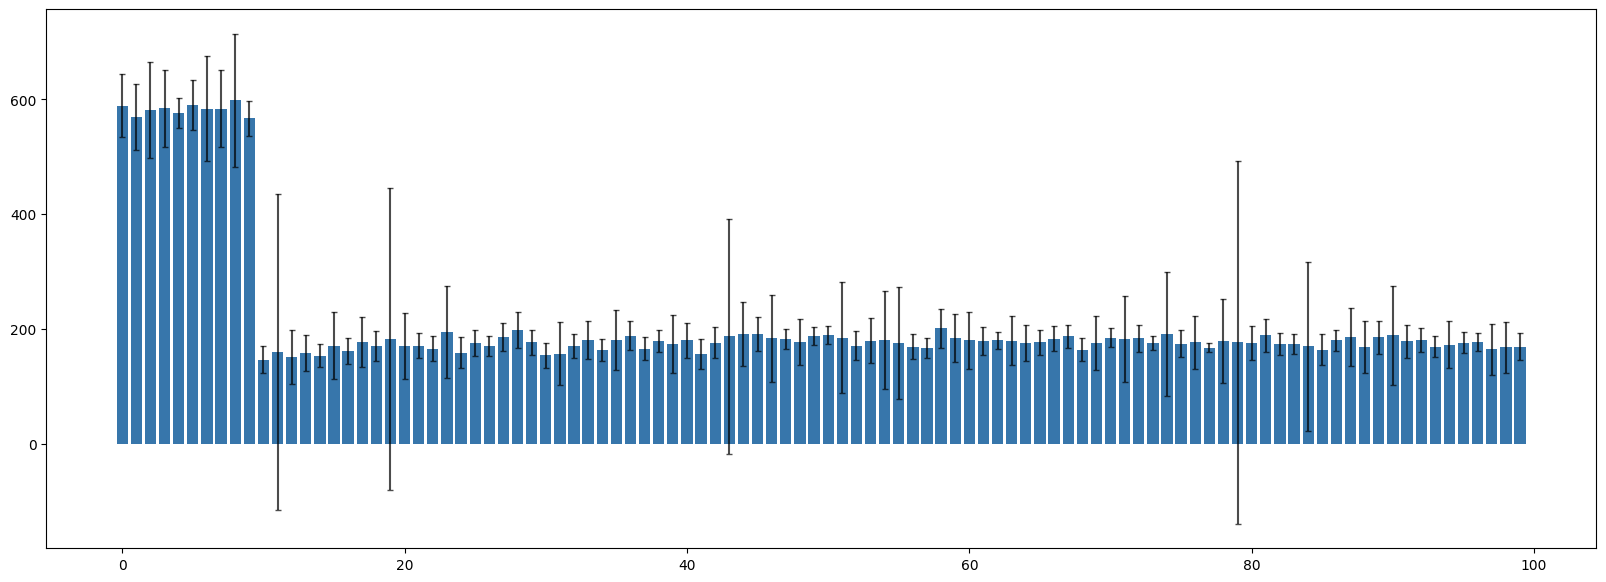

In [27]:
plot_dataset(dataset_python, color=Colors.PYTHON)

## Median response times per request for framework `Rust`

Now, we take a look at the detailed response time medians over all runs for each single request using the framework `Rust`.

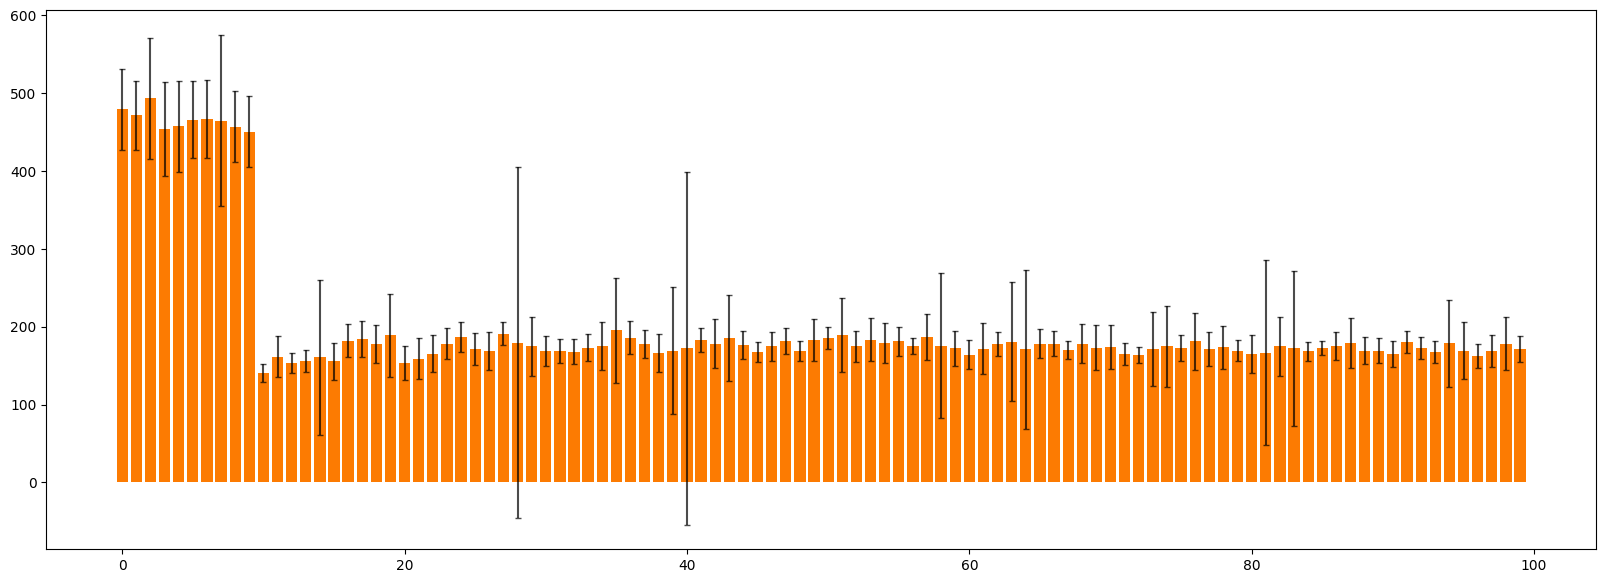

In [28]:
plot_dataset(dataset_rust, color=Colors.RUST)

## Median response times per request compared across frameworks

The following graph shows the median request duration over each request in all runs compared to every other framework used.

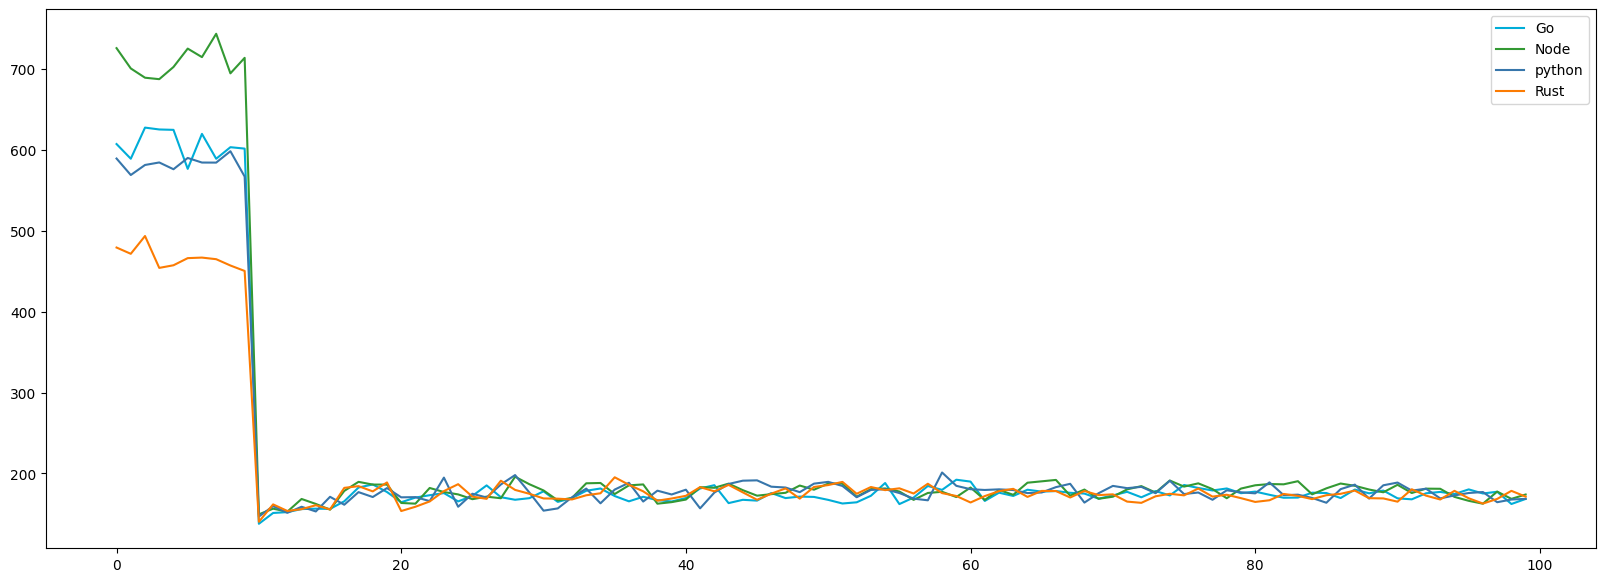

In [29]:
plt.figure(figsize=(20, 7))

plt.plot(range(0, len(dataset_go)), dataset_go.median(1), color=Colors.GO, label="Go")
plt.plot(range(0, len(dataset_node)), dataset_node.median(1), color=Colors.NODE, label="Node")
plt.plot(range(0, len(dataset_python)), dataset_python.median(1), color=Colors.PYTHON, label="python")
plt.plot(range(0, len(dataset_rust)), dataset_rust.median(1), color=Colors.RUST, label="Rust")
plt.legend()
plt.show()

## Median response times per request compared across frameworks (excluding cold starts)

The following graph shows the median request duration over each request in all runs compared to every other framework used. But this time, the cold started requests are excluded to show more details in the hot started requests.

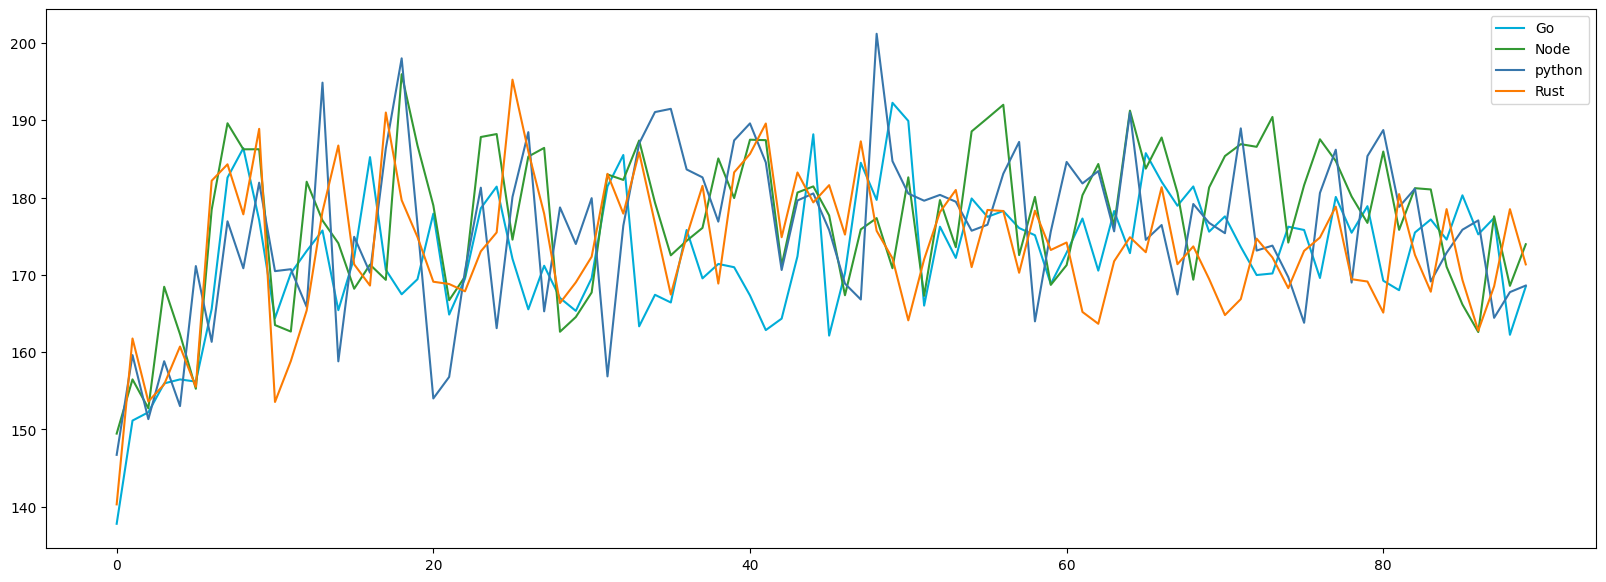

In [30]:
plt.figure(figsize=(20, 7))

d_go = dataset_go[10:]
d_node = dataset_node[10:]
d_python = dataset_python[10:]
d_rust = dataset_rust[10:]

plt.plot(range(0, len(d_go)), d_go.median(1), color=Colors.GO, label="Go")
plt.plot(range(0, len(d_node)), d_node.median(1), color=Colors.NODE, label="Node")
plt.plot(range(0, len(d_python)), d_python.median(1), color=Colors.PYTHON, label="python")
plt.plot(range(0, len(d_rust)), d_rust.median(1), color=Colors.RUST, label="Rust")
plt.legend()
plt.show()